In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import numpy as np
import pandas as pd
# import data plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive data analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [ ]:
tr = pd.read_csv(r"/content/Titanic-Dataset.csv")#reading training dataset

In [ ]:
(tr.shape)

(891, 12)

In [ ]:
tr.info()#collecting information training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
tr.duplicated().sum()#checking for duplicates in training dataset

0

In [ ]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def missing (tr):
    missing_no = tr.isnull().sum().sort_values()
    missing_percent = ((tr.isnull().sum()/tr.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_no, missing_percent], axis=1, keys=['missing_Number', 'missing_Percent'])
    return missing_values

In [ ]:
missing(tr)

,missing_Number,missing_Percent
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


In [ ]:
#fill null values with mean,median ,mode
tr['Age']=tr['Age'].fillna(tr['Age'].mean())
tr['Embarked']=tr['Embarked'].fillna(tr['Embarked'].mode())
print(tr)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [ ]:
sexDict = {'male': 0, 'female': 1}
tr.Sex = [sexDict[item] for item in tr.Sex]
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-17-5351cf5ba8b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = tr.corr()["Survived"].sort_values(ascending=False)
<ipython-input-17-5351cf5ba8b2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr, y=labels, palette='autumn')


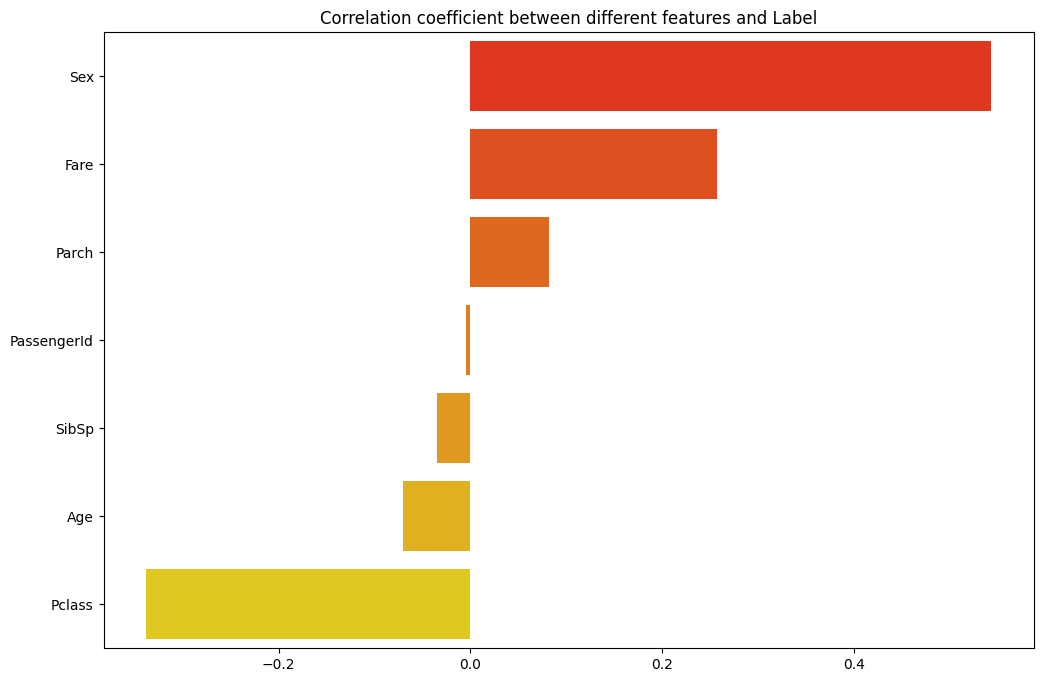

In [ ]:
plt.figure(figsize=(12,8))
data = tr.corr()["Survived"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='autumn')
plt.title('Correlation coefficient between different features and Label')
plt.show()

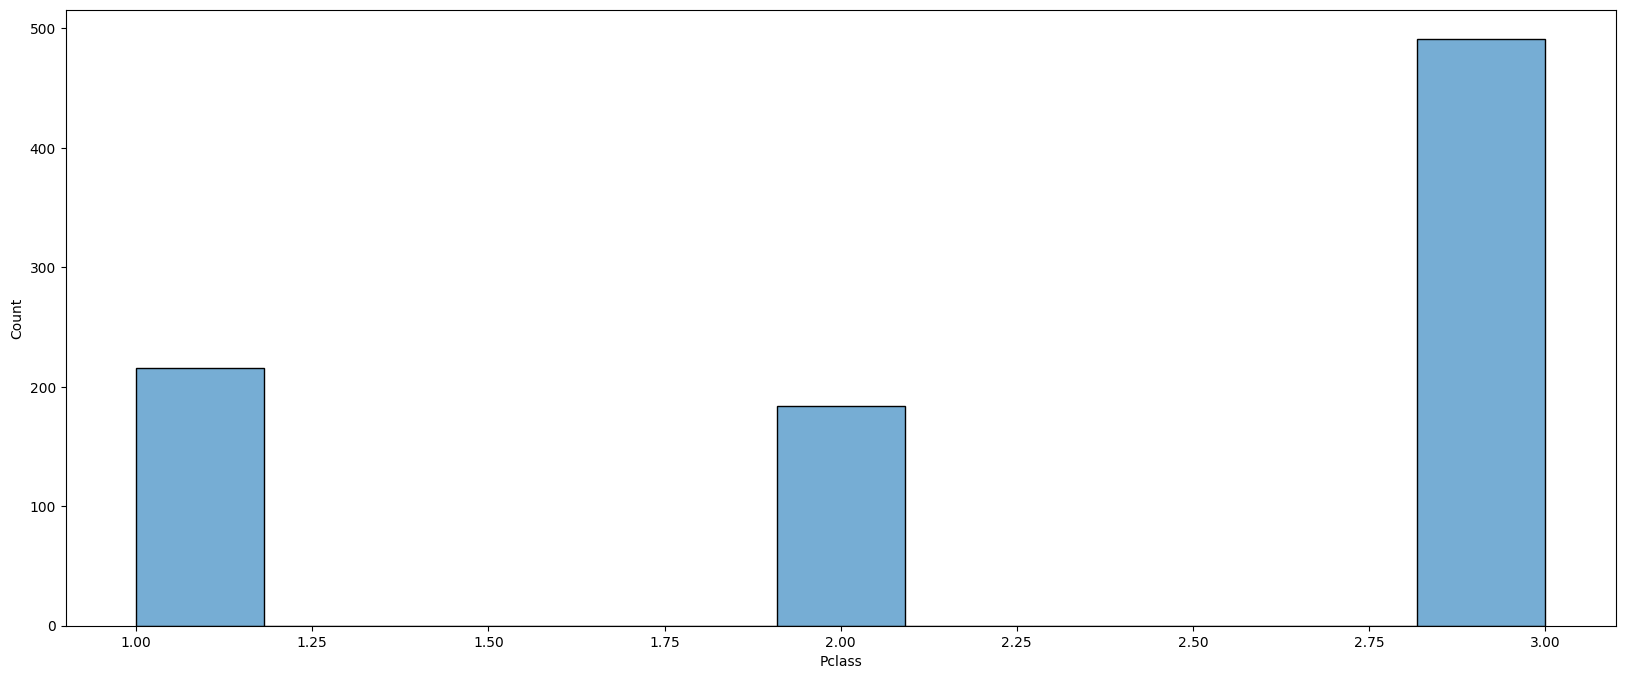

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(tr.Pclass, color=sns.color_palette('Blues_d')[2])
plt.show()

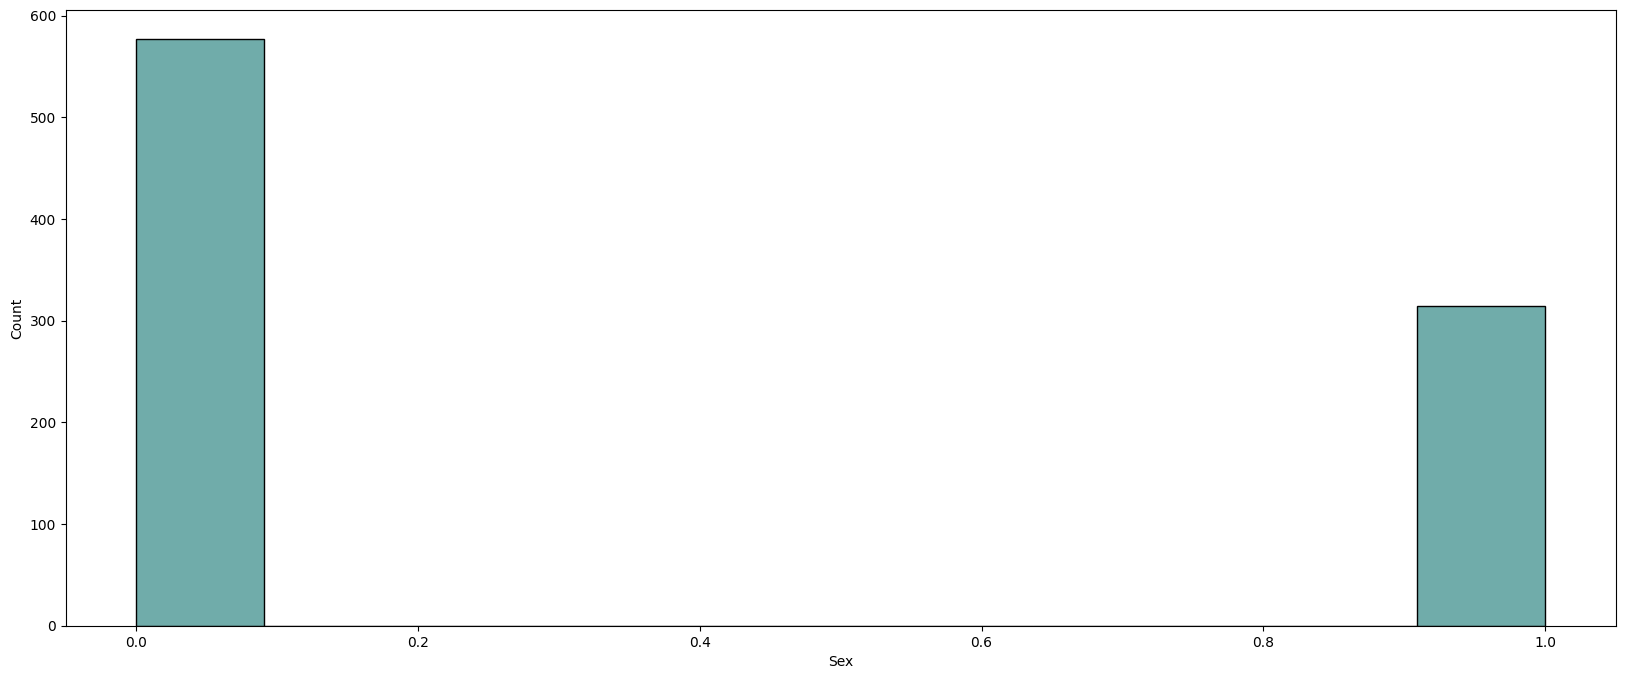

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(tr.Sex, color=sns.color_palette('crest')[2])
plt.show()

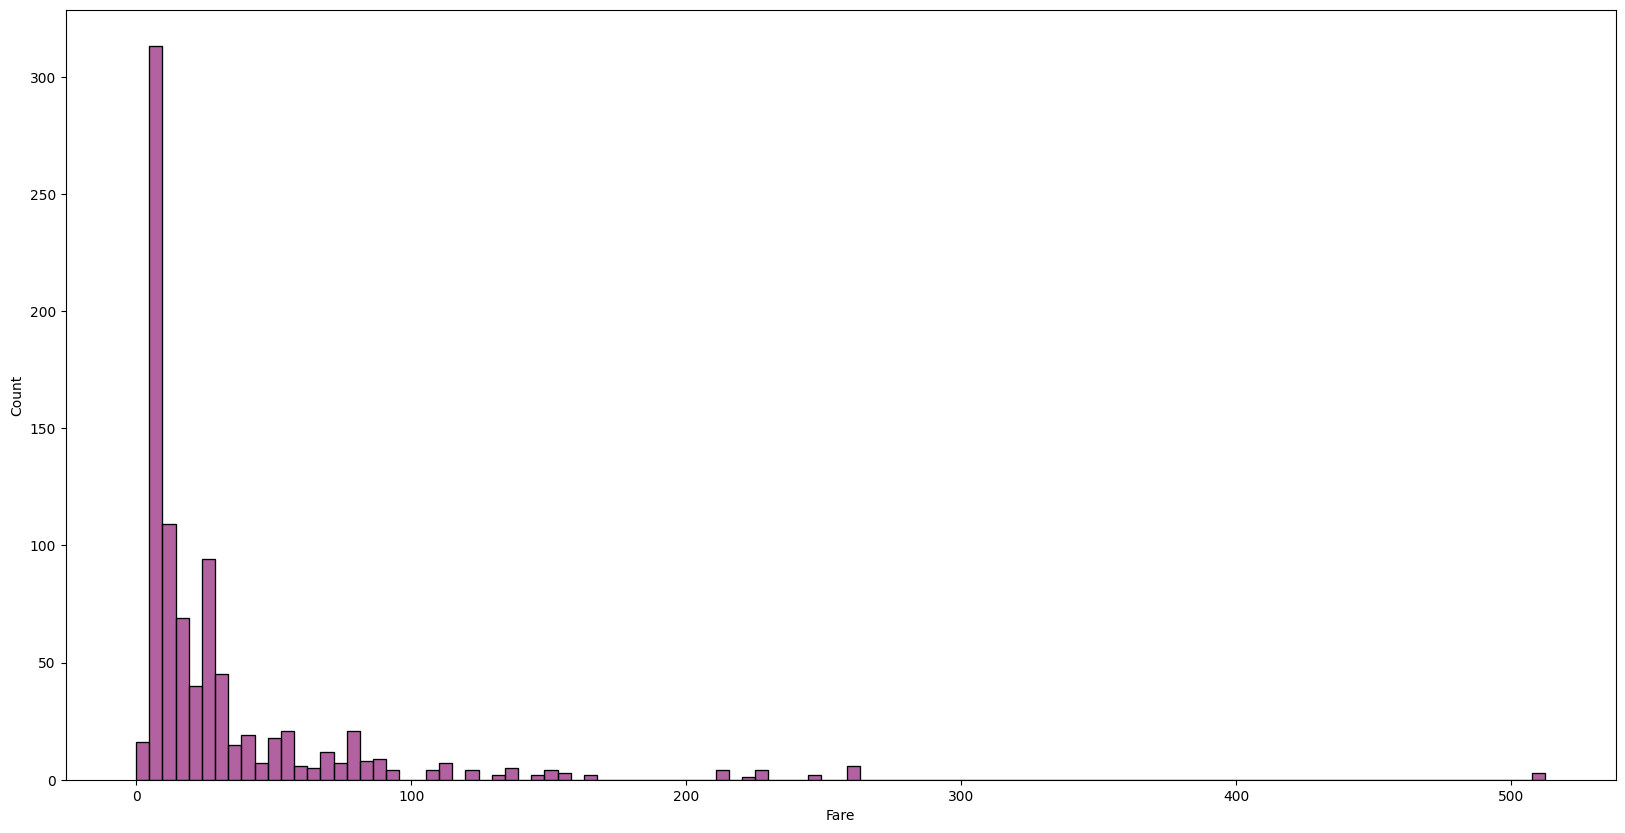

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(tr.Fare, color=sns.color_palette('magma')[2])
plt.show()

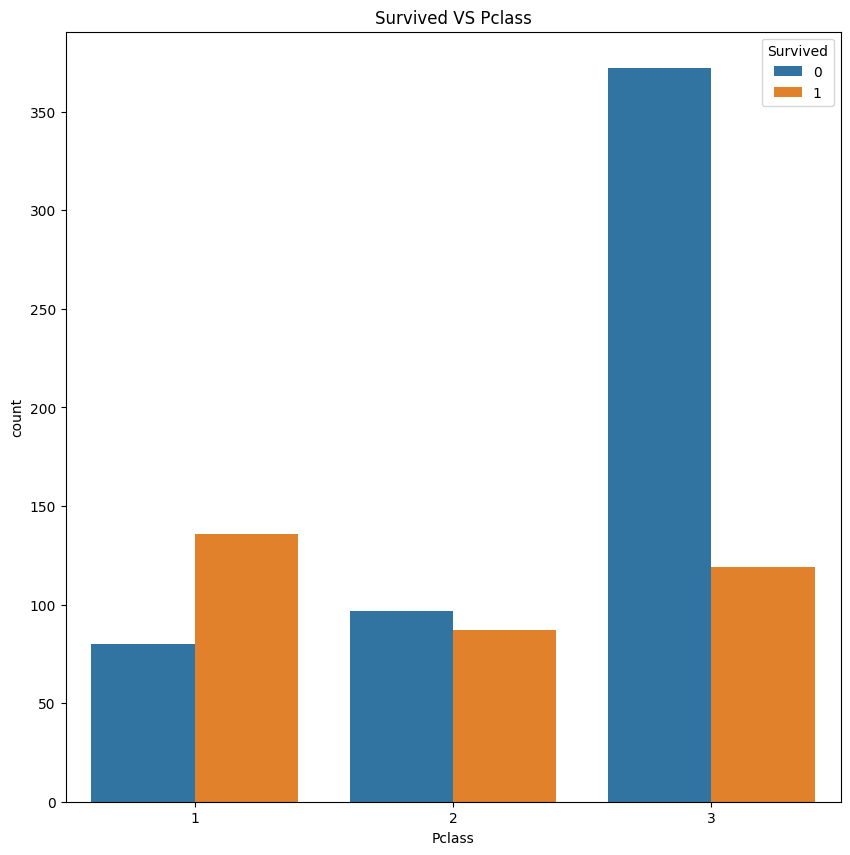

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "Pclass", hue = "Survived", data = tr)
plt.title("Survived VS Pclass")
plt.show()

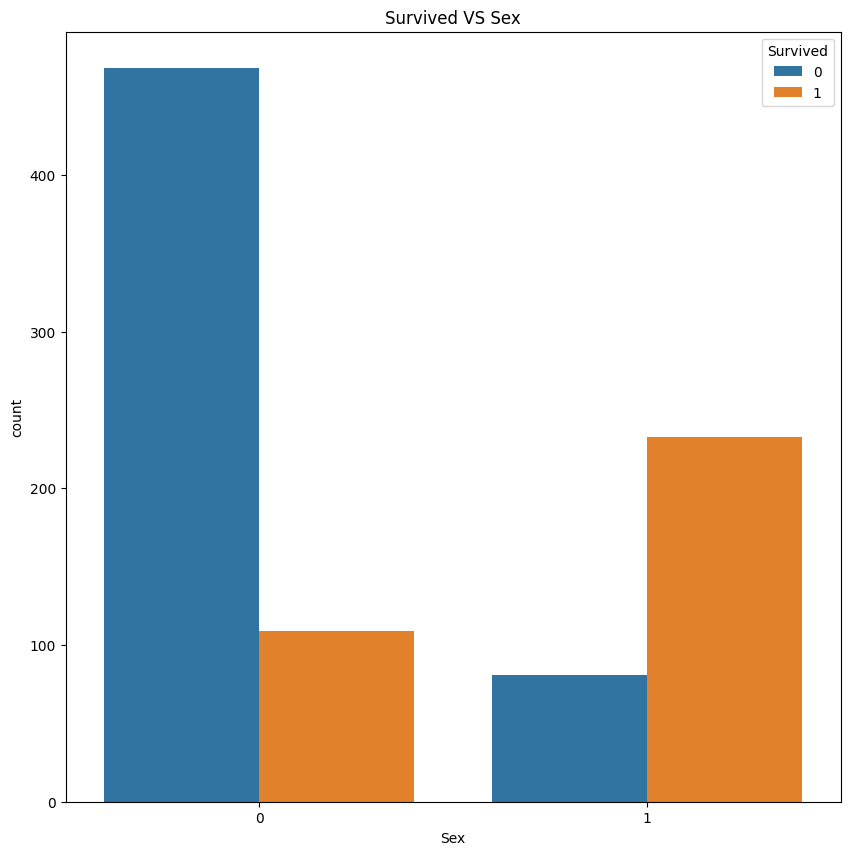

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "Sex", hue = "Survived", data = tr)
plt.title("Survived VS Sex")
plt.show()

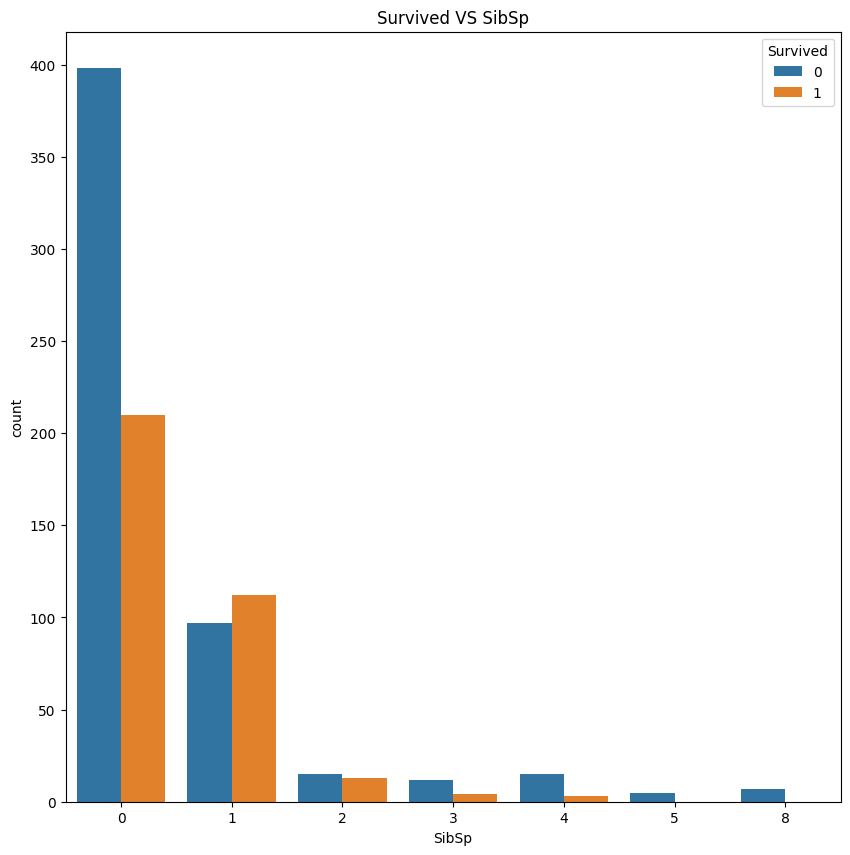

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "SibSp", hue = "Survived", data = tr)
plt.title("Survived VS SibSp")
plt.show()

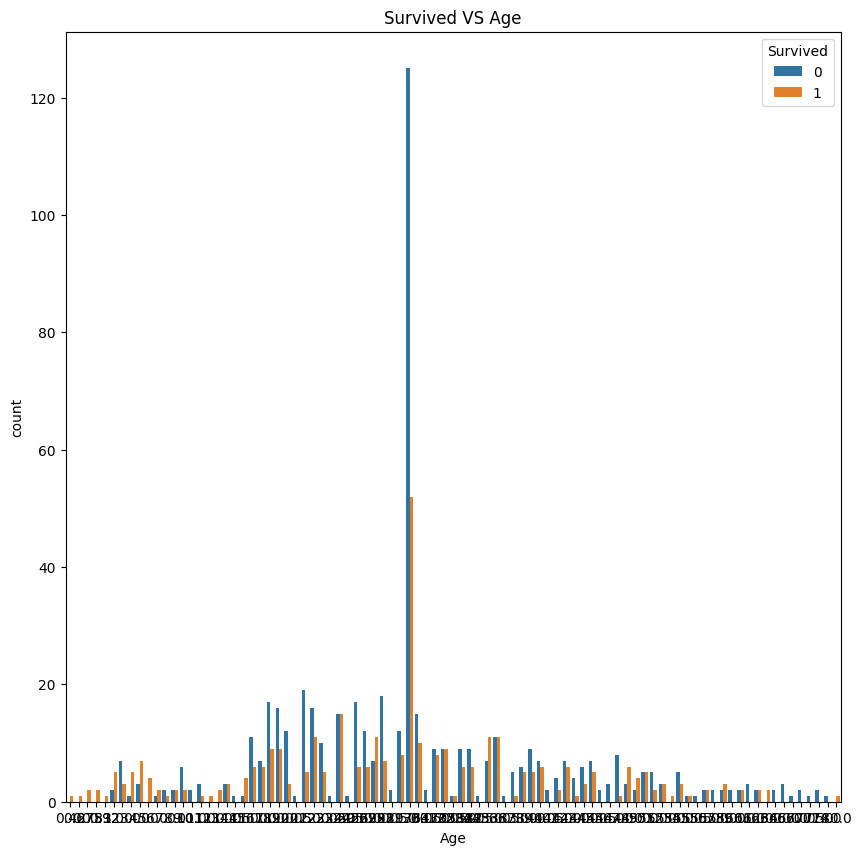

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "Age", hue = "Survived", data = tr)
plt.title("Survived VS Age")
plt.show()

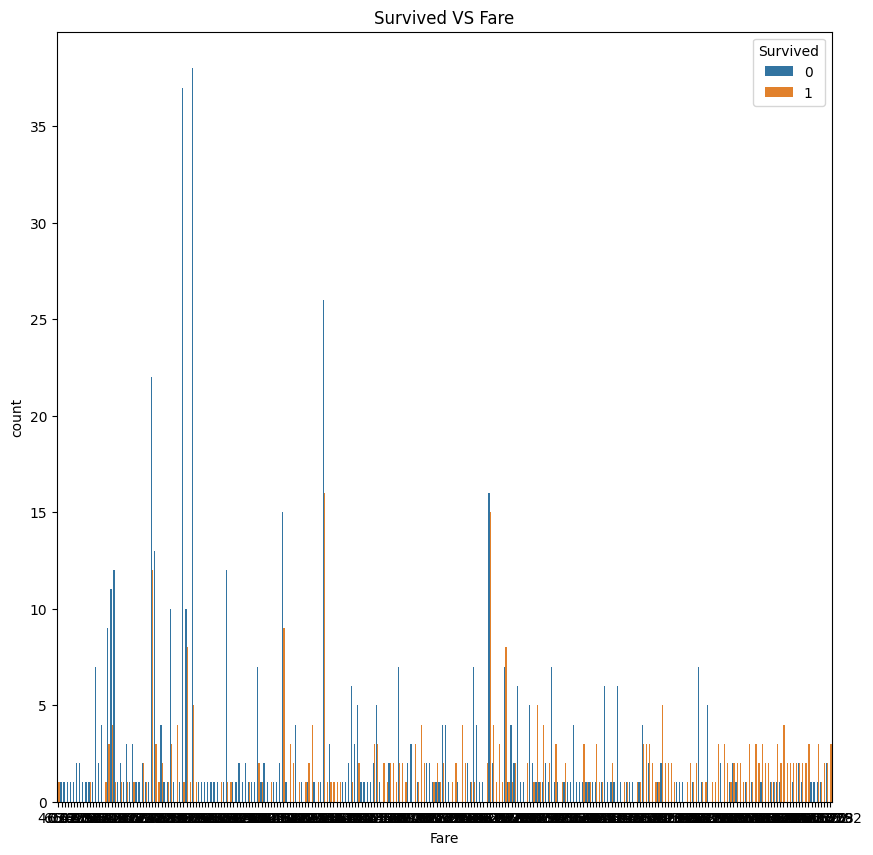

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "Fare", hue = "Survived", data = tr)
plt.title("Survived VS Fare")
plt.show()

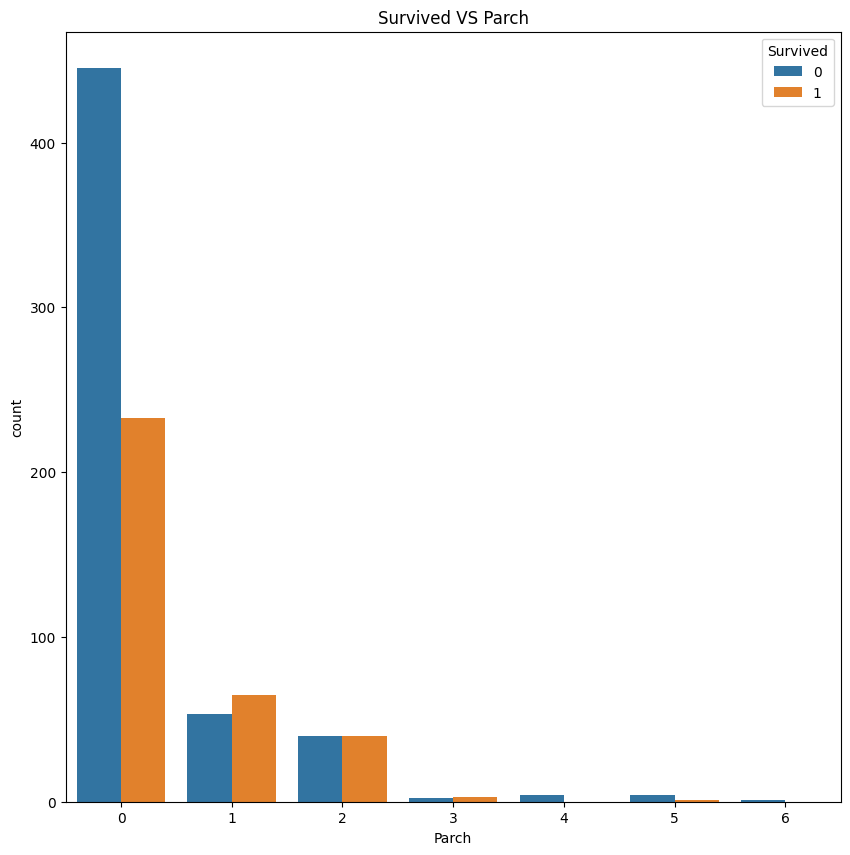

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = "Parch", hue = "Survived", data = tr)
plt.title("Survived VS Parch")
plt.show()

In [ ]:
X=tr.drop(['Survived','Name','Ticket','Cabin','Embarked'], axis=1)
y=tr['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)

1.0

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)

1.0

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_model.score(X_train, y_train)

0.7879213483146067

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train)

0.7514044943820225

In [ ]:
svmLinearModel=sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(X_train, y_train)
svmLinearModel.score(X_train, y_train)

0.7949438202247191

In [ ]:
svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10)
svmRbfModel.fit(X_train, y_train)
svmRbfModel.score(X_train, y_train)

0.675561797752809

In [ ]:
svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
svmPolyModel.fit(X_train, y_train)
svmPolyModel.score(X_train, y_train)

0.7303370786516854

In [ ]:
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(X_train, y_train)
regressionModel.score(X_train, y_train)

0.7963483146067416

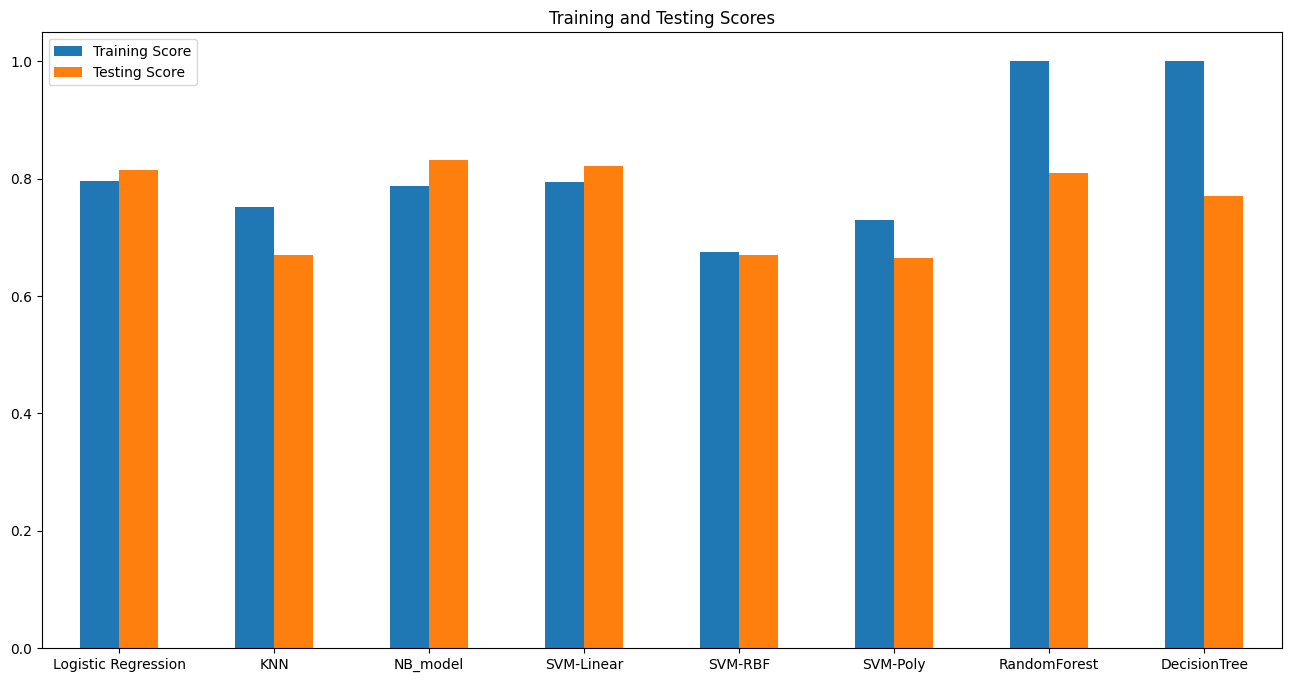

In [ ]:
trainScores = [regressionModel.score(X_train, y_train), knn_model.score(X_train, y_train),NB_model.score(X_train, y_train), svmLinearModel.score(X_train, y_train), svmRbfModel.score(X_train, y_train),svmPolyModel.score(X_train, y_train),random_forest_model.score(X_train, y_train),decision_tree_model.score(X_train, y_train)]
testScores = [regressionModel.score(X_test, y_test), knn_model.score(X_test, y_test), NB_model.score(X_test, y_test),svmLinearModel.score(X_test, y_test), svmRbfModel.score(X_test, y_test),svmPolyModel.score(X_test, y_test),random_forest_model.score(X_test, y_test),decision_tree_model.score(X_test, y_test)]
indices = ['Logistic Regression', 'KNN','NB_model','SVM-Linear', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(figsize=(16, 8), rot=0)
plt.title('Training and Testing Scores')
plt.show()

In [ ]:
scores

,Training Score,Testing Score
Logistic Regression,0.796348,0.815642
KNN,0.751404,0.670391
NB_model,0.787921,0.832402
SVM-Linear,0.794944,0.821229
SVM-RBF,0.675562,0.670391
SVM-Poly,0.730337,0.664804
RandomForest,1.000000,0.810056
DecisionTree,1.000000,0.770950


In [ ]:
predRegression = regressionModel.predict(X_test)
predSVMLinear = svmLinearModel.predict(X_test)
predSVMRbf = svmRbfModel.predict(X_test)
predKNN = knn_model.predict(X_test)
predSVMPoly = svmPolyModel.predict(X_test)
predRandomF = random_forest_model.predict(X_test)
predDTree = decision_tree_model.predict(X_test)
predNBC=NB_model.predict(X_test)
predVals = pd.DataFrame(data={'truth': y_test, 'regression': predRegression, 'knn': predKNN, 'svm-linear': predSVMLinear, 'svm-rbf': predSVMRbf, 'svm-poly': predSVMPoly, 'random-forest': predRandomF, 'decision-tree': predDTree,'Naive Bayes classifier':predNBC})

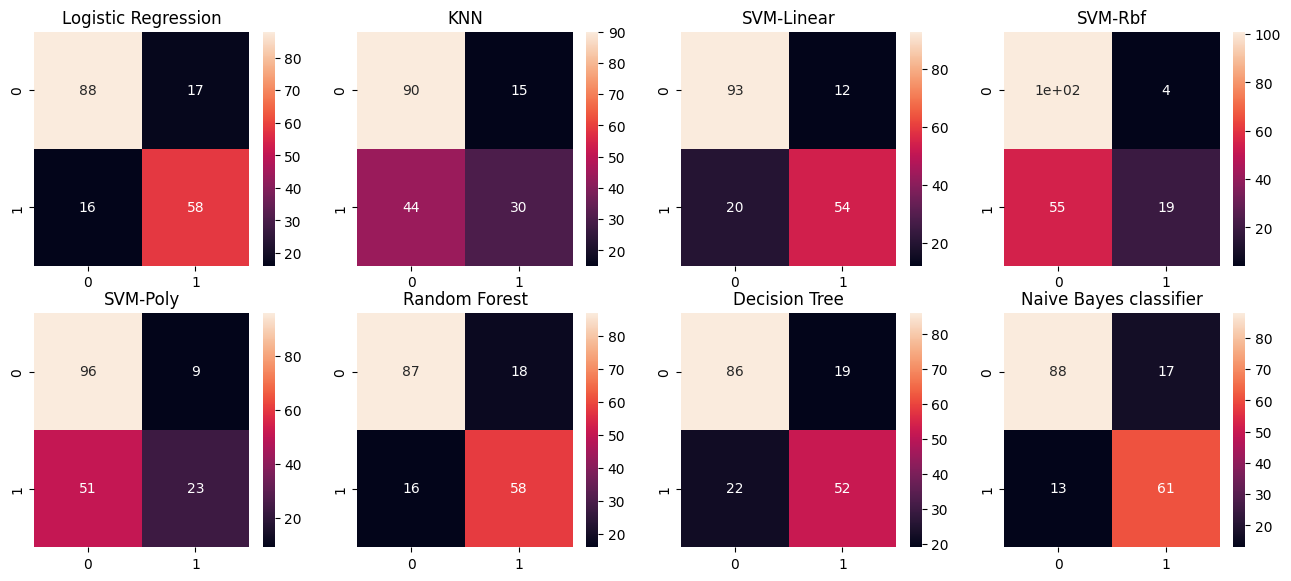

In [ ]:
plt.figure(figsize=(16, 14))
plt.subplot(4, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predRegression), annot=True).set(title='Logistic Regression')
plt.subplot(4, 4, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predKNN), annot=True).set(title='KNN')
plt.subplot(4, 4, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMLinear), annot=True).set(title='SVM-Linear')
plt.subplot(4, 4, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMRbf), annot=True).set(title='SVM-Rbf')
plt.subplot(4, 4, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMPoly), annot=True).set(title='SVM-Poly')
plt.subplot(4, 4, 6)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predRandomF), annot=True).set(title='Random Forest')
plt.subplot(4, 4, 7)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predDTree), annot=True).set(title='Decision Tree')
plt.subplot(4, 4, 8)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predNBC), annot=True).set(title='Naive Bayes classifier')
plt.show()

In [ ]:
print("Logistic Regression:\n\n", sklearn.metrics.classification_report(y_test, predRegression))

Logistic Regression:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
print("KNN:\n\n", sklearn.metrics.classification_report(y_test, predKNN))

KNN:

               precision    recall  f1-score   support

           0       0.67      0.86      0.75       105
           1       0.67      0.41      0.50        74

    accuracy                           0.67       179
   macro avg       0.67      0.63      0.63       179
weighted avg       0.67      0.67      0.65       179



In [ ]:
print("SVM with linear kernel:\n\n", sklearn.metrics.classification_report(y_test, predSVMLinear))

SVM with linear kernel:

               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
print("SVM with RBF kernel:\n\n", sklearn.metrics.classification_report(y_test, predSVMRbf))

SVM with RBF kernel:

               precision    recall  f1-score   support

           0       0.65      0.96      0.77       105
           1       0.83      0.26      0.39        74

    accuracy                           0.67       179
   macro avg       0.74      0.61      0.58       179
weighted avg       0.72      0.67      0.62       179



In [ ]:
print("SVM with poly kernel:\n\n", sklearn.metrics.classification_report(y_test, predSVMPoly))

SVM with poly kernel:

               precision    recall  f1-score   support

           0       0.65      0.91      0.76       105
           1       0.72      0.31      0.43        74

    accuracy                           0.66       179
   macro avg       0.69      0.61      0.60       179
weighted avg       0.68      0.66      0.63       179



In [ ]:
print("Random Forest:\n\n", sklearn.metrics.classification_report(y_test, predRandomF))

Random Forest:

               precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
print("Decision Tree:\n\n", sklearn.metrics.classification_report(y_test, predDTree))

Decision Tree:

               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
print("Naive Bayes classifier:\n\n", sklearn.metrics.classification_report(y_test,predNBC))

Naive Bayes classifier:

               precision    recall  f1-score   support

           0       0.87      0.84      0.85       105
           1       0.78      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

